In [ ]:
# Plot 100 for acf and pacf to see if there is seasonality involved
# Do timeseries decomposition and find strength of seasonality and strength of trend
# GPAC to see if there is a pattern 
# If you have seasonality then you do seansoanl differencing then do acf and pacf then feed that into the gpac. 
#then you will find order of NA and Np of SARIMA Model

#Recommendation:
    #do timeseries decomposition 
    # find trend seasonality 
    #then do autucorrelation for longer 100 then if you spot seasnoalit you do seasonal differencing then u put 
    #in the d parameter

    # before feeding to gpac you have to make data sattionary and plot rolling mean and rolling variance make sure its 
    #stationary then estimate the autocorrelation then feed autucorrelation into gpac and see if u can see a pattern

    #check lab 6, 7, 8, 9, 10
    
#plot rolling mean and variance of stationarity dataset   
#Plot ACF and pacf of stationart data set
# calculate autucorrolation of stationary data set
#feed it to the GPAC, read the pattern, estimate the coeffecient, develop forecast function then do prediction

In [1]:
import pandas_datareader as web

In [2]:
!pip install pandas_datareader

In [2]:
arima = web.DataReader('MXL', data_source='yahoo', start='2002-01-01', end ='2021-09-29')
arima

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-03-24,19.389999,17.559999,17.950001,18.700001,6890400,18.700001
2010-03-25,19.500000,18.040001,18.900000,18.040001,1853900,18.040001
2010-03-26,18.620001,17.900000,18.190001,18.620001,472400,18.620001
2010-03-29,18.969999,18.190001,18.750000,18.700001,371700,18.700001
2010-03-30,18.700001,18.200001,18.700001,18.250000,165000,18.250000
...,...,...,...,...,...,...
2021-09-23,52.160000,51.139999,51.619999,52.130001,345600,52.130001
2021-09-24,53.360001,52.029999,52.200001,52.500000,392900,52.500000
2021-09-27,52.980000,51.720001,51.990002,52.610001,284700,52.610001


In [3]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import time
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pmdarima.arima import auto_arima
import seaborn as sns
from statsmodels.tsa.arima_model import ARIMA
import math
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import STL
import datetime as dt

In [4]:
arima = arima[["Close"]].copy()
arima

,Close
Date,
2010-03-24,18.700001
2010-03-25,18.040001
2010-03-26,18.620001
2010-03-29,18.700001
2010-03-30,18.250000
...,...
2021-09-23,52.130001
2021-09-24,52.500000
2021-09-27,52.610001


# Stock Price Visualization:

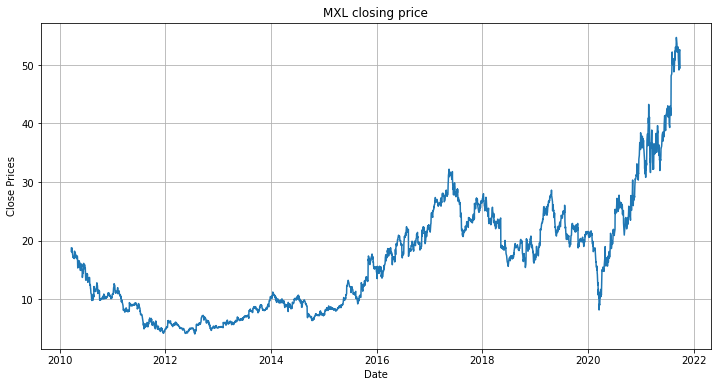

In [5]:
#plot close price
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(arima)
plt.title('MXL closing price')
plt.show()

# Dataset Probability Distribution:

<AxesSubplot:ylabel='Density'>

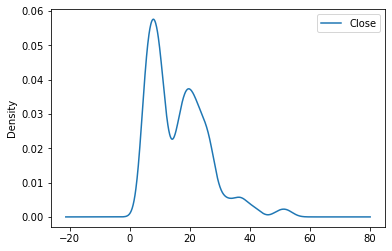

In [6]:
#Distribution of the dataset
MXL = arima
MXL.plot(kind='kde')

In [ ]:
# A time series is also regarded to include three systematic components: 
#level, trend, and seasonality, as well as one non-systematic component termed noise.

#1) The average value in the series is called the level.
#2)The increasing or falling value in the series is referred to as the trend.
#3)Seasonality is the series’ recurring short-term cycle.
#4)The random variance in the series is referred to as noise.

# Autocorrelation & Partial Autocorrelation

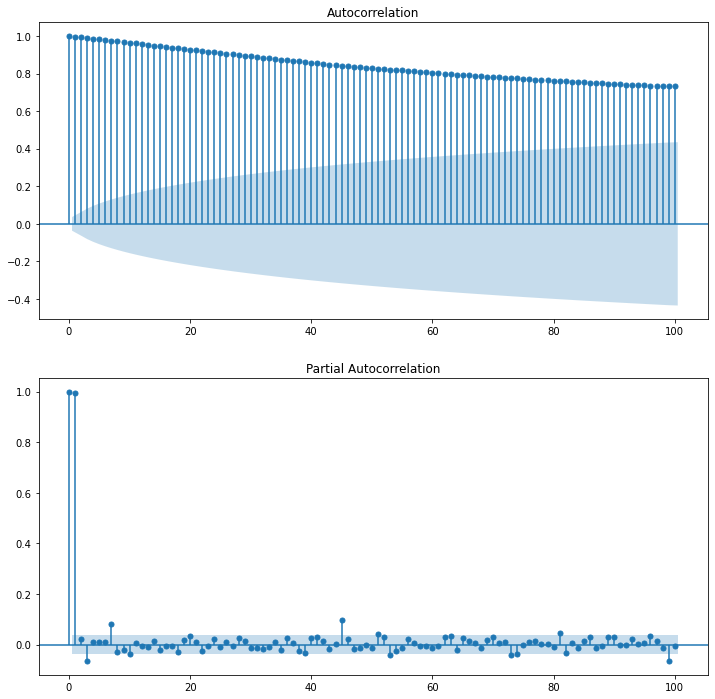

In [6]:
lags = 100

plt.figure(figsize=(12,12))
plt.subplot(211)
plot_acf(arima, ax=plt.gca(), lags = lags)

plt.subplot(212)
plot_pacf(arima, ax=plt.gca(), lags = lags)
plt.show()


# Rolling Statistics Test for staionarity:

In [8]:
Rolling = arima.reset_index()
for i in range(0, arima.shape[0]):
    n = i+1
    mean = sum(arima.head(n)['Close']/n)
    num = (arima['Close'][i] - mean)**2
    arima.loc[arima.index[i], 'Rolling Mean'] = mean
    arima.loc[arima.index[i], 'Rolling Variance'] = num/(n-1)

In [10]:
Rolling

,Date,Close,Rolling Mean,Rolling Variance
0,2010-03-24,18.700001,18.700001,NaN
1,2010-03-25,18.040001,18.370001,0.108900
2,2010-03-26,18.620001,18.453334,0.013889
3,2010-03-29,18.700001,18.515001,0.011408
4,2010-03-30,18.250000,18.462001,0.011236
...,...,...,...,...
2896,2021-09-23,52.130001,16.407332,0.440645
2897,2021-09-24,52.500000,16.419786,0.449355
2898,2021-09-27,52.610001,16.432270,0.451632
2899,2021-09-28,50.000000,16.443845,0.388415


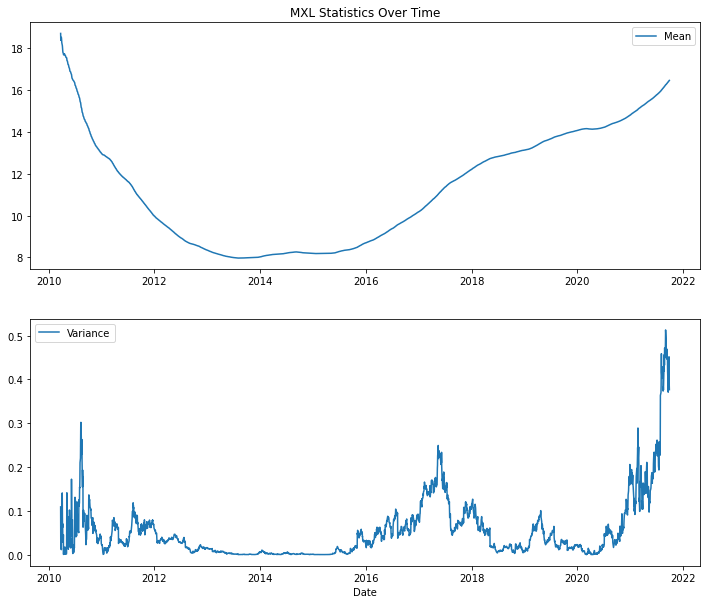

In [11]:
plt.figure(figsize = (12,10))
plt.subplot(211)
plt.title('MXL Statistics Over Time')
plt.plot(Rolling.Date, Rolling['Rolling Mean'], label='Mean')
plt.legend()
plt.subplot(212)
plt.plot(Rolling.Date, Rolling['Rolling Variance'], label='Variance')
plt.legend()
plt.xlabel('Date')
plt.show()

In [12]:
arima

,Close,Rolling Mean,Rolling Variance
Date,,,
2010-03-24,18.700001,18.700001,NaN
2010-03-25,18.040001,18.370001,0.108900
2010-03-26,18.620001,18.453334,0.013889
2010-03-29,18.700001,18.515001,0.011408
2010-03-30,18.250000,18.462001,0.011236
...,...,...,...
2021-09-23,52.130001,16.407332,0.440645
2021-09-24,52.500000,16.419786,0.449355
2021-09-27,52.610001,16.432270,0.451632


In [13]:
arima = arima[['Close']].copy()
arima

,Close
Date,
2010-03-24,18.700001
2010-03-25,18.040001
2010-03-26,18.620001
2010-03-29,18.700001
2010-03-30,18.250000
...,...
2021-09-23,52.130001
2021-09-24,52.500000
2021-09-27,52.610001


# ADF (Augmented Dickey-Fuller) Test for staionarity:

1) ADF test


In [14]:
# ADF test on MXL

result = adfuller(arima['Close'])
print('MXL')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

MXL
ADF Statistic: 0.626736
p-value: 0.988256
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [ ]:

# Since the p-value is bigger than 0.05, the series non-stationary.
# the test statistics exceed the critical values. As a result, the data is nonlinear.

# Seasonality & Trend Strength:

In [15]:
from statsmodels.datasets import co2
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [16]:
data = arima['Close']
data = data.resample('M').mean().ffill()
data

Date
2010-03-31    18.348334
2010-04-30    17.325238
2010-05-31    15.991500
2010-06-30    15.080909
2010-07-31    13.473333
                ...    
2021-05-31    35.110000
2021-06-30    39.681818
2021-07-31    42.414286
2021-08-31    50.631818
2021-09-30    52.063000
Freq: M, Name: Close, Length: 139, dtype: float64

In [20]:
stl = STL(data)
res = stl.fit()

t = res.trend
s = res.seasonal
r = res.resid

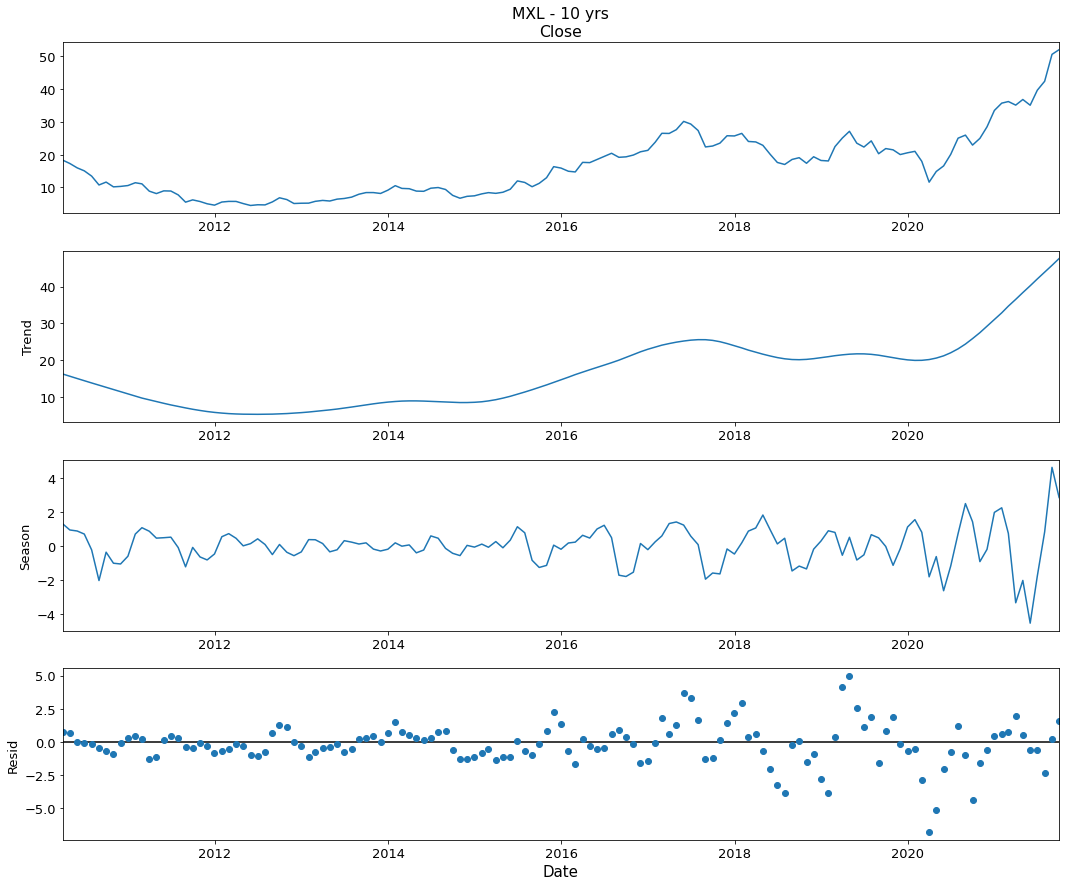

In [21]:
plt.rc('figure', figsize = (15,12))
plt.rc('font', size = 13)

res.plot()
plt.title('MXL - 10 yrs', pad = 650)
plt.xlabel('Date', fontsize =15)
plt.show()

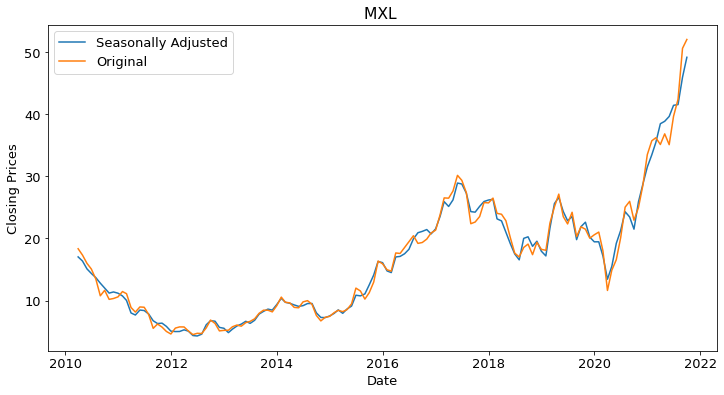

In [23]:
# Seasonally adjusted data
adjusted_seasonal = data - s

plt.figure(figsize=(12,6))
plt.plot(adjusted_seasonal, label='Seasonally Adjusted')
plt.plot(data, label='Original')
plt.title('MXL ')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

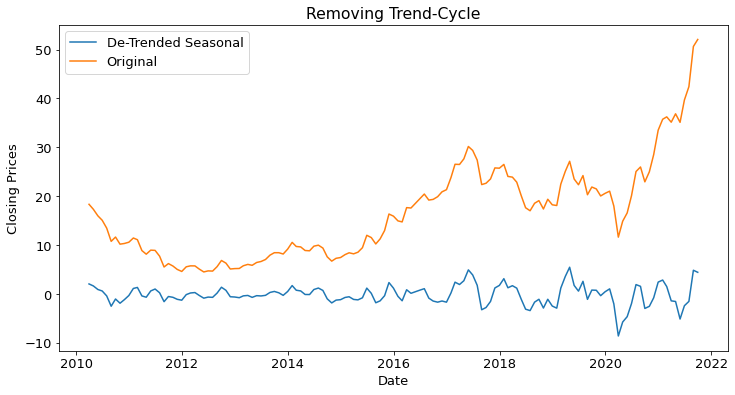

In [24]:
# Detrended data
detrended = data - t

plt.figure(figsize=(12,6))
plt.plot(detrended, label='De-Trended Seasonal')
plt.plot(data, label='Original')
plt.title('Removing Trend-Cycle')
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

In [25]:
# Strength of trend & seasonality
r = np.array(r)
s = np.array(s)
t = np.array(t)
Ft = np.max([0,1-np.var(r)/np.var(t+r)])
Fs = np.max([0,1-np.var(r)/np.var(s+r)])
print('The strength of the trend for this dataset is = ', Ft)
print('The strength of the seasonality for this dataset is = ', Fs)

The strength of the trend for this dataset is =  0.9735137394919399
The strength of the seasonality for this dataset is =  0.38161726095455606


In [ ]:
# To reduce of the growing trend in the series, we first take a log of the series. 
# We then calculate the rolling average of the series after obtaining the log of the series.
#A rolling average is computed by taking data from the previous 12 months and calculating a mean consumption value at each subsequent point in the series.

# Make Data Stationary

In [26]:
# First order differencing of the closing price
df_log1 = arima['Close'].diff()
df_log1

Date
2010-03-24         NaN
2010-03-25   -0.660000
2010-03-26    0.580000
2010-03-29    0.080000
2010-03-30   -0.450001
                ...   
2021-09-23    0.700001
2021-09-24    0.369999
2021-09-27    0.110001
2021-09-28   -2.610001
2021-09-29   -0.500000
Name: Close, Length: 2901, dtype: float64

In [27]:
df_log = pd.DataFrame(data=df_log1)
df_log

,Close
Date,
2010-03-24,NaN
2010-03-25,-0.660000
2010-03-26,0.580000
2010-03-29,0.080000
2010-03-30,-0.450001
...,...
2021-09-23,0.700001
2021-09-24,0.369999
2021-09-27,0.110001


In [28]:
# ADF test First order differencing 
result = adfuller(df_log[1:])
print('MXL First order differencing')
print("ADF Statistic: %f" %result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

MXL First order differencing
ADF Statistic: -21.329797
p-value: 0.000000
Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567


In [44]:
df_log.to_csv('log_prices.csv')

# Plotting Rolling Mean and Standard Deviation After Differencing 

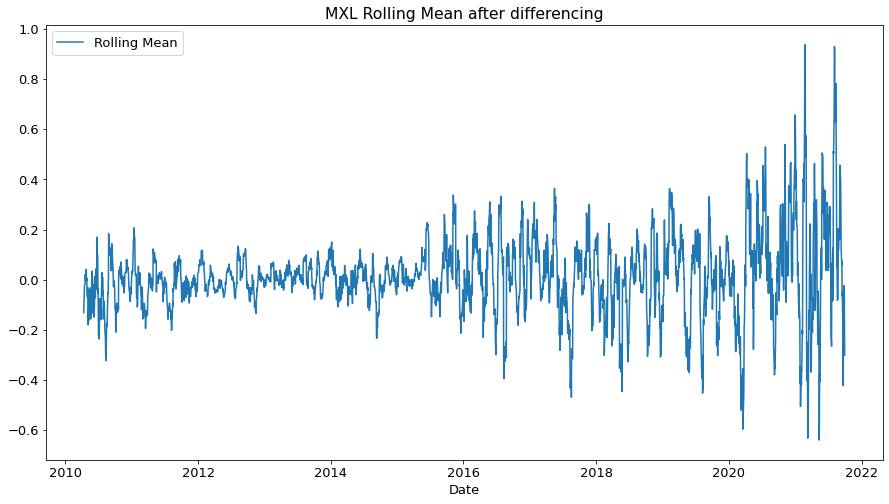

In [29]:
# Plotting mean 

rolling_mean = df_log.rolling(window = 12).mean()

plt.figure(figsize=(15,8))
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.legend()
plt.title('MXL Rolling Mean after differencing')
plt.xlabel('Date')
plt.show()

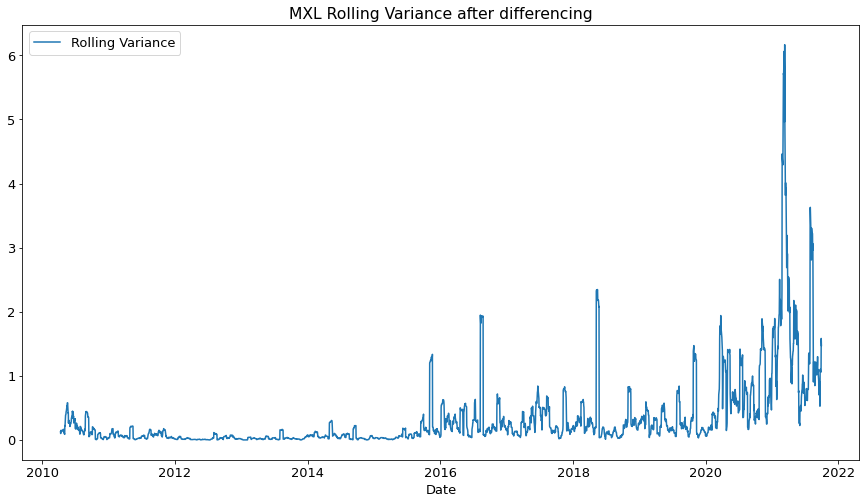

In [30]:
# plotting variance

rolling_var = df_log.rolling(window = 12).var()

plt.figure(figsize=(15,8))
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('MXL Rolling Variance after differencing')
plt.xlabel('Date')
plt.show()

In [45]:
rolling_var.to_csv('rolling_var.csv')

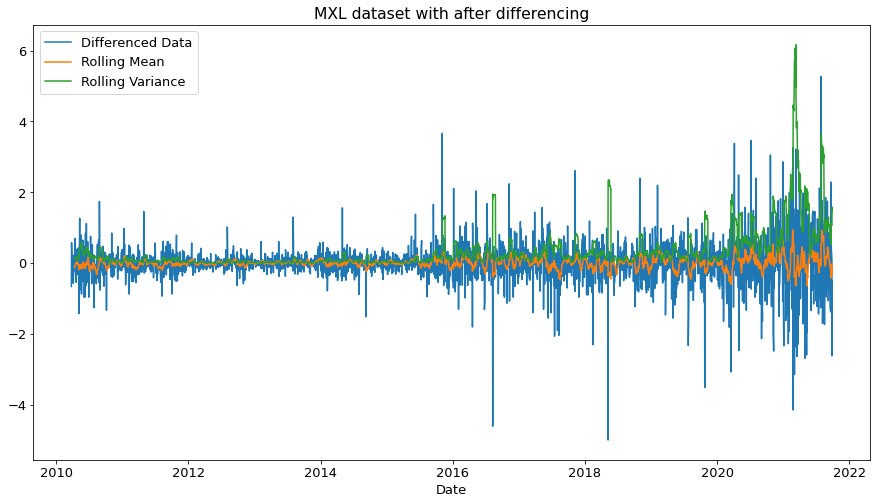

In [31]:
# plotting mean and variance together 

rolling_mean = df_log.rolling(window = 12).mean()
rolling_var = df_log.rolling(window = 12).var()


plt.figure(figsize=(15,8))
plt.plot(df_log.index.values, df_log, label = 'Differenced Data')
plt.plot(rolling_mean, label = 'Rolling Mean')
plt.plot(rolling_var, label = 'Rolling Variance')
plt.legend()
plt.title('MXL dataset with after differencing')
plt.xlabel('Date')
plt.show()

# Plotting MXL Stock Price After Differencing

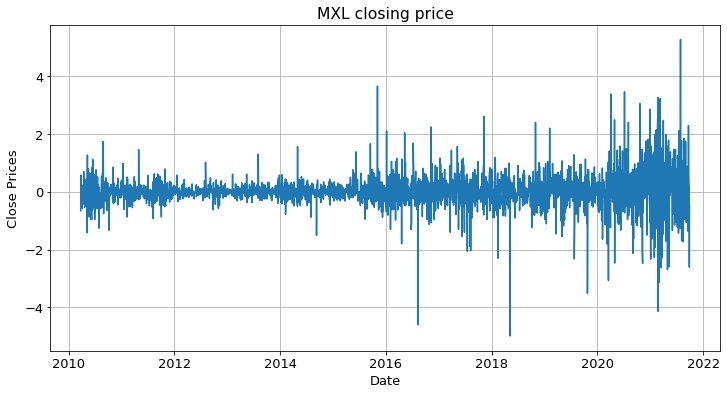

In [32]:
plt.figure(figsize=(12,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Close Prices')
plt.plot(df_log)
plt.title('MXL closing price')
plt.show()

# Autocorrelation & Partial Autocorrelation After Differencing (After Reaching Stationarity) (found HW4 $ HW 9)

In [33]:
def autocorr_cal(y, lags):
    
    ry = [1]
    mean = np.mean(y)

    for i in range(1, lags+1):
        sum_auto = 0
        for j in range(i, len(y)):
            sum_auto += (y[j]-mean)*(y[j-i]-mean)

        auto_cov = sum_auto/len(y)

        
        ry.append(auto_cov/np.var(y))
    return ry

            

In [34]:
df_log

,Close
Date,
2010-03-24,NaN
2010-03-25,-0.660000
2010-03-26,0.580000
2010-03-29,0.080000
2010-03-30,-0.450001
...,...
2021-09-23,0.700001
2021-09-24,0.369999
2021-09-27,0.110001


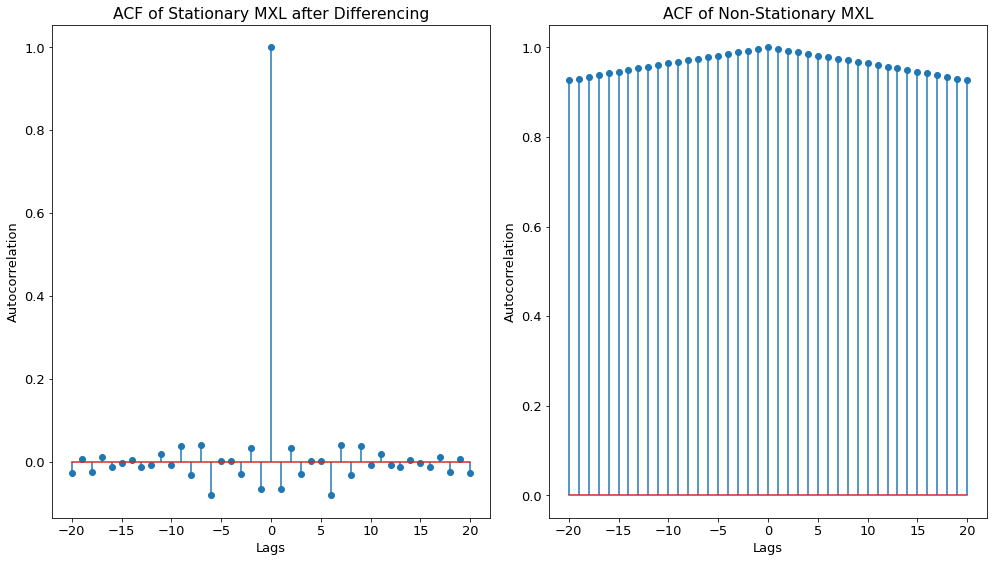

In [35]:
#def auocorr_cal(y, lags):

tau = 20
ry = autocorr_cal(df_log['Close'][1:], tau)
x = np.linspace(-20,20,41)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot autocorrelation
fig = plt.figure(figsize = (14,8))
ax1 = fig.add_subplot(1,2,1)
ax1.stem(x, Ry, use_line_collection = True)
ax1.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax1.set_title('ACF of Stationary MXL after Differencing')

# Find autocorrelation of APPLE at 20 lags
tau = 20
ry = autocorr_cal(arima['Close'], tau)

# Create reverse of ry, ryy
ryy = ry[::-1]
Ry = ryy + ry[1::]

# Plot 
ax2 = fig.add_subplot(1,2,2)
ax2.stem(x, Ry, use_line_collection = True)
ax2.set(xlabel = 'Lags', ylabel = 'Autocorrelation')
ax2.set_title('ACF of Non-Stationary MXL')

fig.tight_layout()
plt.show()
    

In [36]:
Ry

[0.9263713760084483,
 0.9299978025242511,
 0.9338139743994018,
 0.9377682411881022,
 0.941556754315287,
 0.9452837477625217,
 0.9490474152284225,
 0.952697074615372,
 0.9564915273745315,
 0.960221306394356,
 0.9638760953737847,
 0.9675734640160732,
 0.9709955436354872,
 0.9743639435144299,
 0.9775258482640296,
 0.9812374292001245,
 0.9850290304037325,
 0.9888613096282186,
 0.9928047264978481,
 0.996315857065441,
 1,
 0.996315857065441,
 0.9928047264978481,
 0.9888613096282186,
 0.9850290304037325,
 0.9812374292001245,
 0.9775258482640296,
 0.9743639435144299,
 0.9709955436354872,
 0.9675734640160732,
 0.9638760953737847,
 0.960221306394356,
 0.9564915273745315,
 0.952697074615372,
 0.9490474152284225,
 0.9452837477625217,
 0.941556754315287,
 0.9377682411881022,
 0.9338139743994018,
 0.9299978025242511,
 0.9263713760084483]

In [37]:
def GPAC_cal(Ry, k, j): # RY is the estimated autocorrelation
    
    for c in range(1, k):
        
        if c == 1:
            phi_col = []
            for i in range(j):
                start = len(Ry)//2 + i + 1
                num = Ry[start]
                den = Ry[start-1]
                phi_col.append((num/den).tolist())
                matrix1 = np.array(phi_col)

        elif c == 2:
            phi_col = []
            for i in range(j):  
                start = len(Ry)//2 + i
                l_col = Ry[start:start+c] 
                r_num = Ry[start+1:start+c+1]  
                num = np.column_stack((l_col,r_num))
                r_den = Ry[start-1:start+c-1]
                den = np.column_stack((l_col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix2 = np.array(phi_col).reshape(j,1)
            matrix = np.column_stack((matrix1,matrix2))
        else:
            phi_col = []
            for i in range(j):
                col = []
                for a in range(c-1): 
                    start = len(Ry)//2 + i
                    col.append(Ry[start-a:start+c-a].tolist())
                col = np.array(col).T
                r_num = Ry[start+1:start+c+1]
                r_den = Ry[start-c+1:start+1]
                num = np.column_stack((col,r_num))
                den = np.column_stack((col,r_den))
                phi_col.append(np.linalg.det(num)/np.linalg.det(den))
            matrix3 = np.array(phi_col)
            matrix = np.column_stack((matrix,matrix3))
    plt.figure(figsize=(12,8))
    sns.heatmap(matrix, annot=True, annot_kws={'size':15}, fmt='.3f', xticklabels=np.arange(1, k, step=1))
    sns.color_palette('rocket')
    plt.show()

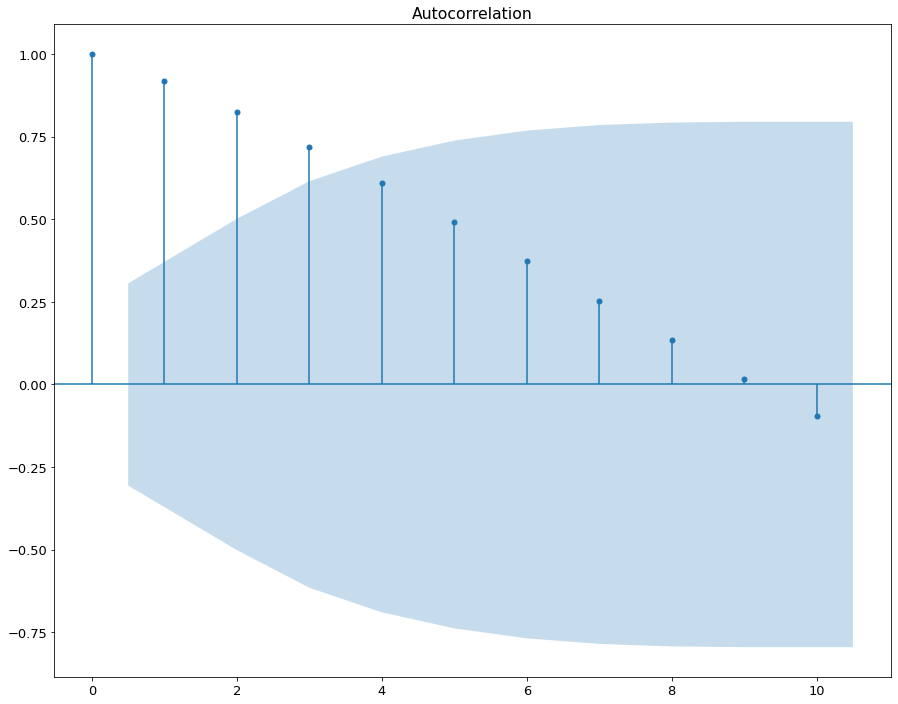

In [38]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_acf(Ry, lags=10)
plt.show()


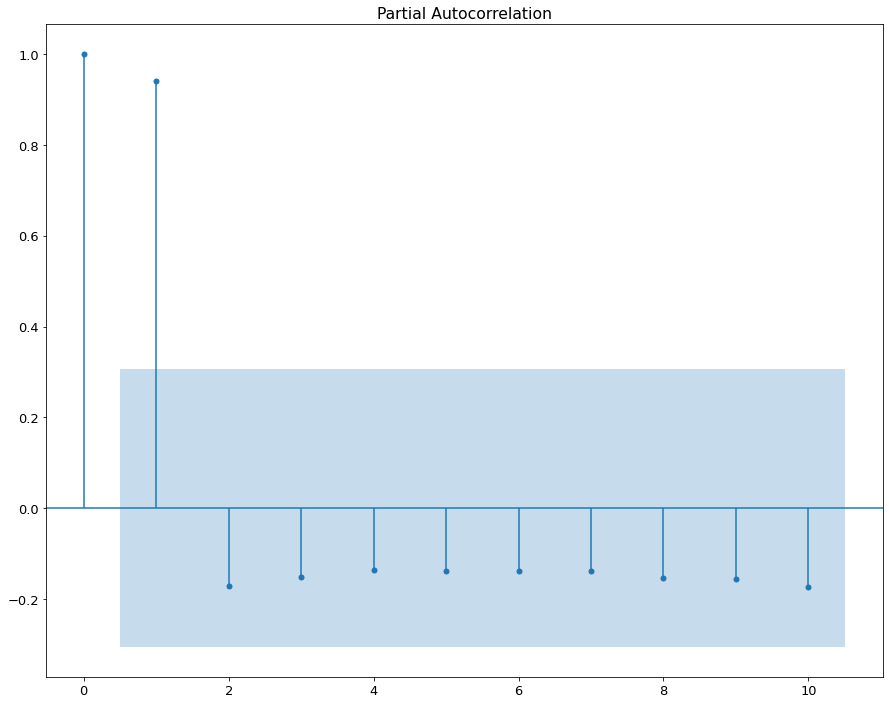

In [39]:
from statsmodels.graphics import tsaplots
import matplotlib.pyplot as plt

#plot autocorrelation function
fig = tsaplots.plot_pacf(Ry, lags=10)
plt.show()

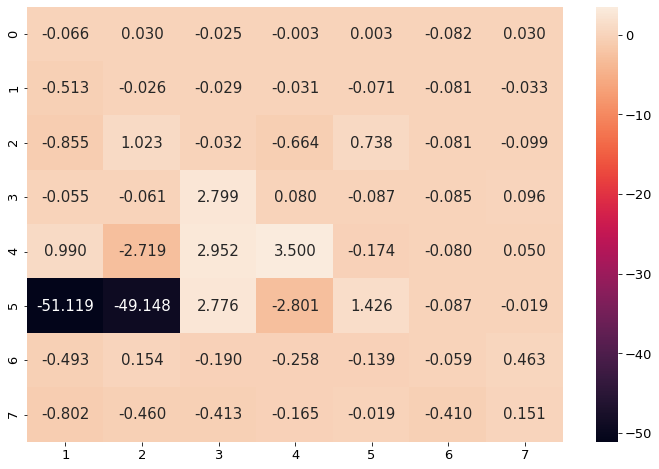

In [40]:
# Plot ACF & PACF
lags = 100

# GPAC
ry = sm.tsa.stattools.acf(df_log[1:], nlags=lags)
ry1 = ry[::-1]
Ry = np.concatenate((ry1[0:-1], ry))
GPAC_cal(Ry,8,8)

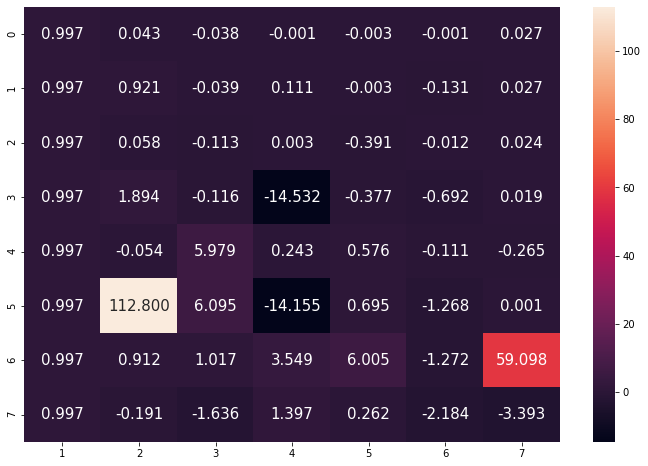

In [46]:
# #Plot ACF & PACF
#lags = 100

#GPAC
#ry = sm.tsa.stattools.acf(arima, nlags=lags)
#ry1 = ry[::-1]
#Ry = np.concatenate((ry1[0:-1], ry))
#GPAC_cal(Ry,8,8)

# Splitting data into training and testing

In [39]:
arima['Close']

Date
2002-01-02      0.416071
2002-01-03      0.421071
2002-01-04      0.423036
2002-01-07      0.408929
2002-01-08      0.403750
                 ...    
2021-09-23    146.830002
2021-09-24    146.919998
2021-09-27    145.369995
2021-09-28    141.910004
2021-09-29    142.830002
Name: Close, Length: 4971, dtype: float64

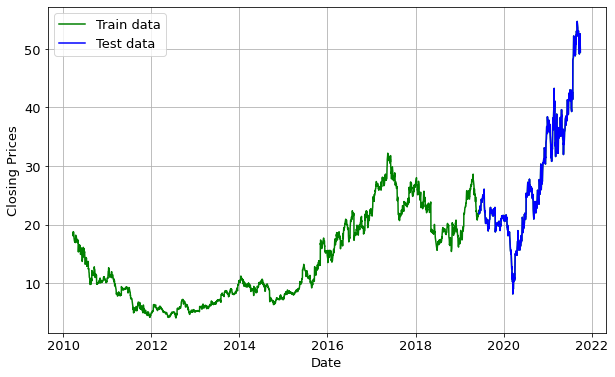

In [41]:
#split data into train and training set
train_data, test_data = arima['Close'][0:int(len(arima['Close'])*0.80)], arima['Close'][int(len(arima['Close'])*0.80):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(arima['Close'], 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

In [42]:
print(len(train_data))
print(len(test_data))

2320
581


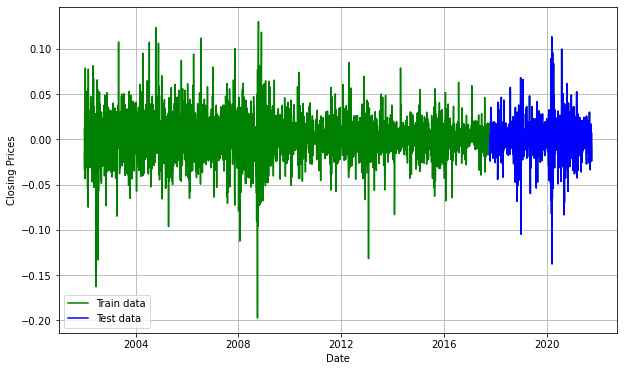

In [38]:
#split data into train and training set
train_data, test_data = df_log1[0:int(len(df_log1)*0.8)], df_log1[int(len(df_log1)*0.8):]
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Prices')
plt.plot(df_log1, 'green', label='Train data')
plt.plot(test_data, 'blue', label='Test data')
plt.legend()

# Naive Model

In [43]:
# the last period value is the forecat for this period

naive = arima
naive

,Close
Date,
2010-03-24,18.700001
2010-03-25,18.040001
2010-03-26,18.620001
2010-03-29,18.700001
2010-03-30,18.250000
...,...
2021-09-23,52.130001
2021-09-24,52.500000
2021-09-27,52.610001


In [44]:
naive ['lag'] = arima['Close'].shift(1)
naive

,Close,lag
Date,,
2010-03-24,18.700001,NaN
2010-03-25,18.040001,18.700001
2010-03-26,18.620001,18.040001
2010-03-29,18.700001,18.620001
2010-03-30,18.250000,18.700001
...,...,...
2021-09-23,52.130001,51.430000
2021-09-24,52.500000,52.130001
2021-09-27,52.610001,52.500000


In [45]:
# splitting data into 80 training 20 test

train, test = naive[1:naive.shape[0]-581], naive[naive.shape[0]-581:]

In [46]:
train_x, train_y = train['lag'], train['Close']
test_x, test_y = test['lag'], test['Close']

In [47]:
forecast = test_x.copy()


In [48]:
print(forecast)
print(test_y)

# the first are the forecasted values and the second are the actual values
# as we see the value of 2020-12-30 is the predicted values for price 2020-12-31

Date
2019-06-12    22.129999
2019-06-13    21.850000
2019-06-14    21.959999
2019-06-17    22.180000
2019-06-18    21.920000
                ...    
2021-09-23    51.430000
2021-09-24    52.130001
2021-09-27    52.500000
2021-09-28    52.610001
2021-09-29    50.000000
Name: lag, Length: 581, dtype: float64
Date
2019-06-12    21.850000
2019-06-13    21.959999
2019-06-14    22.180000
2019-06-17    21.920000
2019-06-18    22.820000
                ...    
2021-09-23    52.130001
2021-09-24    52.500000
2021-09-27    52.610001
2021-09-28    50.000000
2021-09-29    49.500000
Name: Close, Length: 581, dtype: float64


In [49]:
mse = mean_squared_error(test_y, forecast)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_y, forecast)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_y, forecast))
print('RMSE: '+str(rmse))

MSE: 0.9654501474362621
MAE: 0.6928571907870741
RMSE: 0.9825732275185713


In [50]:
def train_MSE(error_sq):
    
    return sum(error_sq.fillna(0))/(len(error_sq) - 1)

In [51]:
def test_MSE(error_sq):

    return sum(error_sq)/(len(error_sq))  

# Alternatively for MSE: mse = np.square(np.subtract(y_test,prediction)).mean()

In [52]:
def variance(error_sq):

    return sum(error_sq.fillna(0))/(len(arima['Close']) - 1)

In [54]:
# Copy training dataframe
naive = arima.copy(deep = True)

# Generate close(t-1)
for i in range(0, naive.shape[0]-1):
     naive.loc[naive.index[i+1], 'naive'] = naive['Close'][i]

# Generate error term
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e'] = naive['Close'][i] - naive['naive'][i]

# Generate squared error
for i in range(1, naive.shape[0]):
    naive.loc[naive.index[i], 'naive_e^2'] = naive['naive_e'][i]**2

# split data to train and test
train = naive[:2320]
test = naive[2320:]

# Get MSE for naive train and test sets
naive_train_MSE = train_MSE(train['naive_e^2'])
naive_test_MSE = test_MSE(test['naive_e^2'])
naive

,Close,lag,naive,naive_e,naive_e^2
Date,,,,,
2010-03-24,18.700001,NaN,NaN,NaN,NaN
2010-03-25,18.040001,18.700001,18.700001,-0.660000,0.435600
2010-03-26,18.620001,18.040001,18.040001,0.580000,0.336400
2010-03-29,18.700001,18.620001,18.620001,0.080000,0.006400
2010-03-30,18.250000,18.700001,18.700001,-0.450001,0.202501
...,...,...,...,...,...
2021-09-23,52.130001,51.430000,51.430000,0.700001,0.490001
2021-09-24,52.500000,52.130001,52.130001,0.369999,0.136899
2021-09-27,52.610001,52.500000,52.500000,0.110001,0.012100


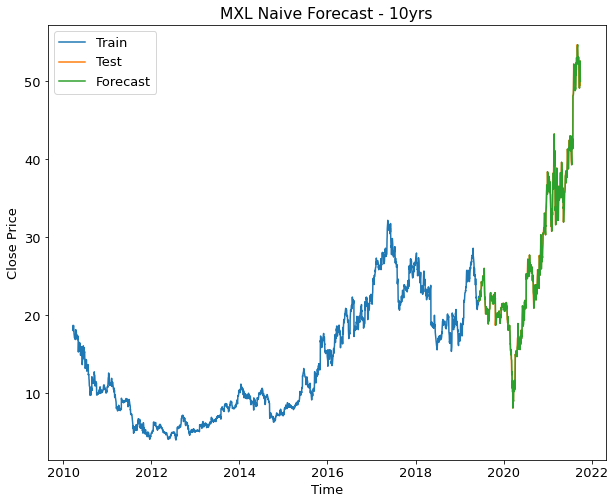

In [56]:
plt.figure(figsize = (10,8))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(test.index, test['naive'], label='Forecast')
plt.title('MXL Naive Forecast - 10yrs')
plt.xlabel('Time')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()

In [57]:
# Print MSE results
print('MSE of prediction errors: ', naive_train_MSE)
print('MSE of forecast errors: ', naive_test_MSE)

MSE of prediction errors:  0.17086829112065433
MSE of forecast errors:  0.9654501474362621


# ARIMA Model

In [ ]:
# Auto ARIMA: Automatically discover the optimal order for an ARIMA model. 

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=2487.654, Time=0.31 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=2485.110, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=2485.163, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=2485.683, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=2487.044, Time=0.23 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=2486.940, Time=0.66 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=2489.049, Time=0.35 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=2483.144, Time=0.06 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=2485.077, Time=0.09 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=2484.972, Time=0.36 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=2483.197, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=2486.871, Time=0.53 sec

Best model:  ARIMA(1,1,0)(0,0,0)[0]          
Total fit time: 3.117 seconds
                               SARIMAX Results                                
Dep. Vari

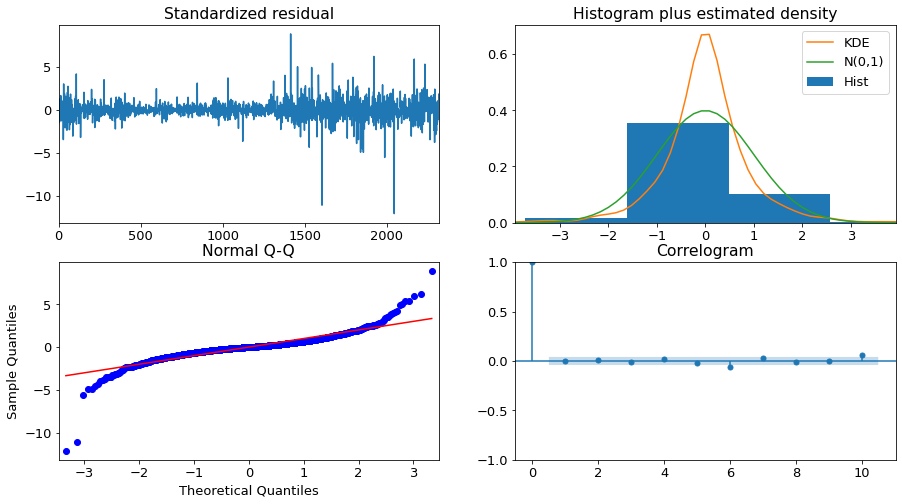

In [58]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)
print(model_autoARIMA.summary())
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

In [ ]:
#Top left: The residual errors appear to have a uniform variance and fluctuate around a mean of zero.

#Top Right: The density plot on the top right suggests a normal distribution with a mean of zero.

#Bottom left: The red line should be perfectly aligned with all of the dots. Any significant deviations would indicate a skewed distribution.

#Bottom Right: The residual errors are not autocorrelated, as shown by the Correlogram, also known as the ACF plot. Any autocorrelation would imply that the residual errors have a pattern that isn’t explained by the model. As a result, you’ll need to add more Xs (predictors) to the model.

# Modeling:


In [56]:
# Build Model
# if differencing is involved then train data must be raw data that is non stationary
# develop forecasting function after building the model

#  fit a model using training data, and then to evaluate its performance on a test data set.
model = ARIMA(train_data, order=(0,1,0))  
fitted = model.fit() 
print(fitted.summary())



#from statsmodels.tsa.arima_model import ARMA
#from statsmodels.tsa.arima.model import ARIMA

#model = ARMA(train_data, order=(1, 1))# fit model
#fitted = model.fit(disp=-1)  
#print(fitted.summary())


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 3975
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 -95.937
Method:                           css   S.D. of innovations              0.248
Date:                Sat, 20 Nov 2021   AIC                            195.874
Time:                        21:35:35   BIC                            208.449
Sample:                             1   HQIC                           200.333
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.004      2.531      0.011       0.002       0.018


# Forecasting

In [73]:
# ARIMA Walk Forward

data = train_data
predict = []
for t in test_data:
    model = ARIMA(data, order=(1,1,0))
    model_fit = model.fit()
    y = model_fit.forecast()
    print(y[0][0])
    predict.append(y[0][0])
    data = np.append(data,t)
    data = pd.Series(data)

22.14572610787617
21.86376157277622
21.956626306442793
22.17188713368966
21.932948397257977
22.781569759285233
22.879216833425964
23.139992904136896
23.027749151002936
22.49612608789161
22.376081786374588
22.706302425801187
23.324529700327595
23.43821256186316
24.28435318451796
24.131184838830727
24.036327368382544
23.98455469814911
23.82928303394939
24.02320810006322
24.396016880276036
24.46040631961975
24.77839429998258
25.070329838876198
24.767034197107485
24.580410020894607
24.888448793524812
24.8070718951328
24.898418879174876
24.759230843736525
25.97692768141285
25.555772602282126
23.310607801688214
22.14100510221666
22.33294290791256
21.99453333343501
21.41231233785175
20.976112565090872
20.207413819239086
20.19032098734994
20.432207532606125
21.1077254700376
20.619228796307944
20.42696085720592
20.95193315683327
20.237775826434515
20.181724963731387
20.64378270657651
20.63192182461863
20.659798574329507
20.815240274761436
20.627984983689053
19.60730586101918
19.386875451882922


In [74]:
predict

[22.14572610787617,
 21.86376157277622,
 21.956626306442793,
 22.17188713368966,
 21.932948397257977,
 22.781569759285233,
 22.879216833425964,
 23.139992904136896,
 23.027749151002936,
 22.49612608789161,
 22.376081786374588,
 22.706302425801187,
 23.324529700327595,
 23.43821256186316,
 24.28435318451796,
 24.131184838830727,
 24.036327368382544,
 23.98455469814911,
 23.82928303394939,
 24.02320810006322,
 24.396016880276036,
 24.46040631961975,
 24.77839429998258,
 25.070329838876198,
 24.767034197107485,
 24.580410020894607,
 24.888448793524812,
 24.8070718951328,
 24.898418879174876,
 24.759230843736525,
 25.97692768141285,
 25.555772602282126,
 23.310607801688214,
 22.14100510221666,
 22.33294290791256,
 21.99453333343501,
 21.41231233785175,
 20.976112565090872,
 20.207413819239086,
 20.19032098734994,
 20.432207532606125,
 21.1077254700376,
 20.619228796307944,
 20.42696085720592,
 20.95193315683327,
 20.237775826434515,
 20.181724963731387,
 20.64378270657651,
 20.631921824618

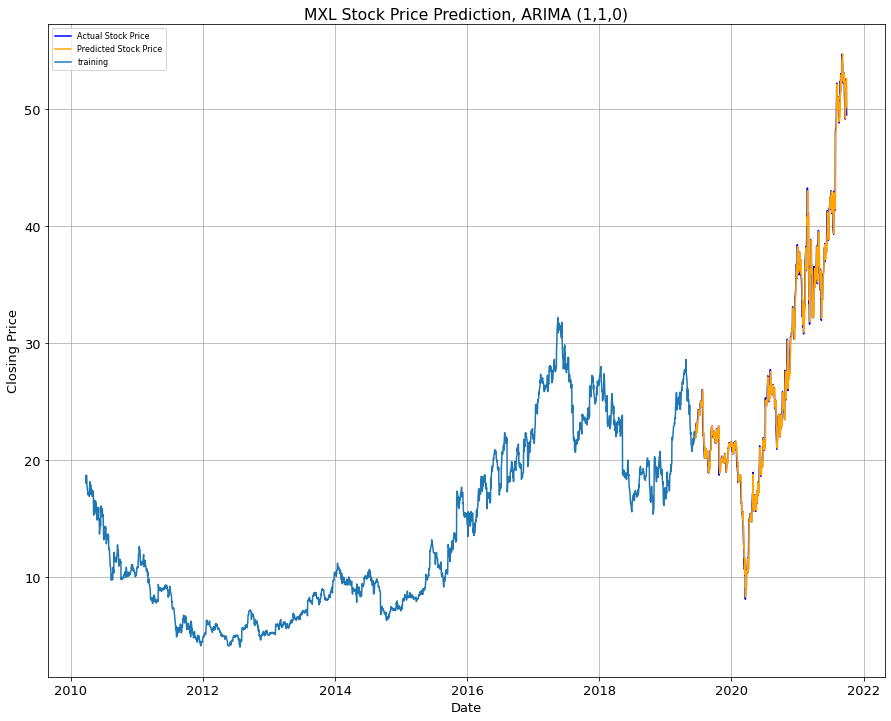

In [76]:
predict = pd.Series(predict, index=test_data.index)
#lower_series = pd.Series(conf[:, 0], index=test_data.index)
#upper_series = pd.Series(conf[:, 1], index=test_data.index)

plt.plot(test_data, color = 'blue', label='Actual Stock Price')
plt.plot(predict, color = 'orange',label='Predicted Stock Price')
plt.plot(train_data, label='training')
#plt.fill_between(lower_series.index, lower_series, upper_series, 
                 #color='k', alpha=0.10)
plt.title('MXL Stock Price Prediction, ARIMA (1,1,0)')
plt.xlabel('Date')
plt.grid(True)
plt.ylabel('Closing Price')
plt.legend(loc='upper left', fontsize=8)
plt.show()

# Accuracy Measures:

In [77]:
# Model Performance
mse = mean_squared_error(test_data, predict)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, predict)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, predict))
print('RMSE: '+str(rmse))

MSE: 0.9614270193982878
MAE: 0.6884389384303161
RMSE: 0.9805238494795973


In [79]:
Accuracy = pd.DataFrame({'MSE':mse, 'MAE': mae, 'RMSE':rmse}, index=[1])
Accuracy

,MSE,MAE,RMSE
1,0.961427,0.688439,0.980524


In [ ]:
# p Autoregressive -  Yt = a+ b1Yt-1 + b2Yt-2 + error 1

# when p = 2

#stock price today(yt)(Nov 8) = a + b1(price yesterday)(Nov 7) + b2(price day before )(Nov 6) + error   


# q Moving Average - Yt = a + Et + b1Et-1 + b2Et-2

#the present value of time series model are dependent on its past values and on the error of past values. the error is the difference between actual 
#values and predicted values. 

# q determines the number of past lag values error used to predict yt (determined by ACF Plot)

# Hyperparameter Tunning (p,d,q)

In [79]:
train,test = arima[:801], arima[801:]

In [177]:
train

Date
2018-01-02     43.064999
2018-01-03     43.057499
2018-01-04     43.257500
2018-01-05     43.750000
2018-01-08     43.587502
                 ...    
2021-03-03    122.059998
2021-03-04    120.129997
2021-03-05    121.419998
2021-03-08    116.360001
2021-03-09    121.089996
Name: Close, Length: 801, dtype: float64

In [80]:
test

,AAPL
Date,
2021-03-10,121.03
2021-03-11,123.99
2021-03-12,125.57
2021-03-15,124.76
2021-03-16,120.53
...,...
2021-09-23,146.83
2021-09-24,146.92
2021-09-27,145.37


In [81]:
import warnings
from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error


In [83]:
p_values = range(0, 8)
d_values = range(0, 1) #this is the range for the values
q_values = range(0, 0) #this is the range for the values

In [84]:
for p in p_values:
    for d in d_values:
        for q in q_values:
            order = (p,d,q)
            train,test = arima[:754], arima[754:]
            predictions = list()
            for i in range(len(test)):
                try:
                    model = ARIMA(train,order)
                    model_fit = model.fit(disp=0)
                    pred_y = model_fit.forecast()[0]
                    predictions.append(pred_y)
                    error = mean_squared_error(test, predictions)
                    print('Best ARIMA%s , MSE = %.2f' % (order, error))
                except:
                    continue
          

Best ARIMA(0, 0, 0) , MSE = 4949.47
Best ARIMA(0, 0, 1) , MSE = 1527.38
Best ARIMA(0, 0, 2) , MSE = 1258.64
Best ARIMA(1, 0, 0) , MSE = 133.24
Best ARIMA(2, 0, 0) , MSE = 128.05
